# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,758,81,45,68,137,60,7,152,45,19,151,167,333,179,81,3,13,179,183
1,370,96,41,77,177,64,5,177,36,21,134,205,485,148,74,0,4,196,198
2,358,87,45,82,164,60,8,156,42,19,144,181,366,174,70,2,2,190,196
3,65,89,41,75,143,56,7,146,46,19,137,170,317,156,76,18,5,184,188
4,330,98,44,78,160,63,8,142,47,18,148,160,300,171,63,19,2,201,207
5,516,92,42,75,172,60,8,147,45,19,142,174,322,160,62,22,10,206,211
6,265,80,45,71,128,56,7,151,45,19,147,171,337,176,79,3,16,181,187
7,322,87,43,65,127,56,8,149,46,19,143,169,322,171,85,6,3,180,182
8,263,89,35,70,138,58,7,126,53,17,128,147,237,112,64,4,19,199,207
9,300,106,53,98,193,60,10,215,31,24,169,224,681,218,73,8,21,188,197


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.797814,93.564663,44.786885,81.914390,169.380692,61.901639,8.608379,168.240437,41.016393,20.526412,147.837887,188.19490,436.373406,174.138434,72.329690,6.353370,12.688525,189.122040,195.901639
std,241.640993,8.163359,6.062639,15.620907,33.347086,7.609623,4.638541,32.513284,7.711596,2.539781,14.181731,30.98016,172.036537,32.395578,7.618088,4.966576,8.931791,6.220232,7.339858
min,0.000000,73.000000,33.000000,40.000000,109.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.00000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,216.000000,88.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,34.000000,19.000000,137.000000,168.00000,318.000000,148.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,414.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.00000,366.000000,172.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,622.000000,99.000000,49.000000,96.000000,197.000000,66.000000,10.000000,196.000000,46.000000,23.000000,160.000000,216.00000,576.000000,196.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,61.000000,28.000000,186.000000,320.00000,998.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [7]:
import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

f1 : 0.7300745550745551
accurace : 0.7407407407407407
accurace2: 220


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

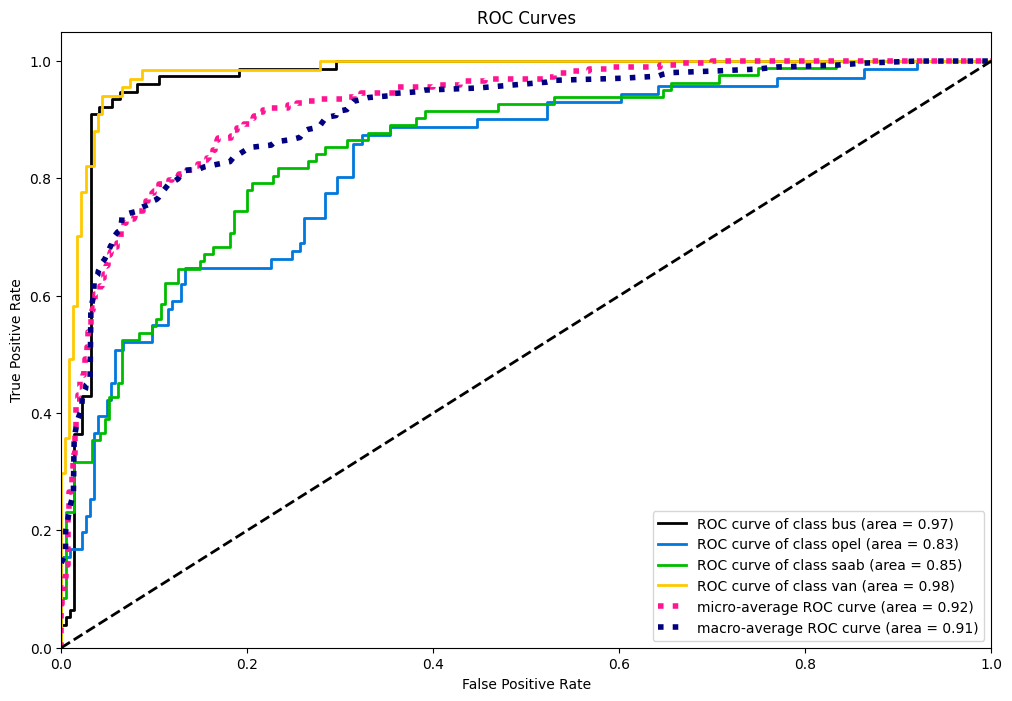

In [8]:
LR=LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500)
LR.fit(X_train , y_train)
y_pred=LR.predict(X_test)
print(f"f1 :  {f1_score(y_pred, y_test, average='macro')}")
print(f"accurace : {accuracy_score(y_pred, y_test)}")
print(f"accurace2: {accuracy_score(y_pred,y_test,normalize=False)}")

probs = LR.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [9]:
### YOUR CODE HERE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

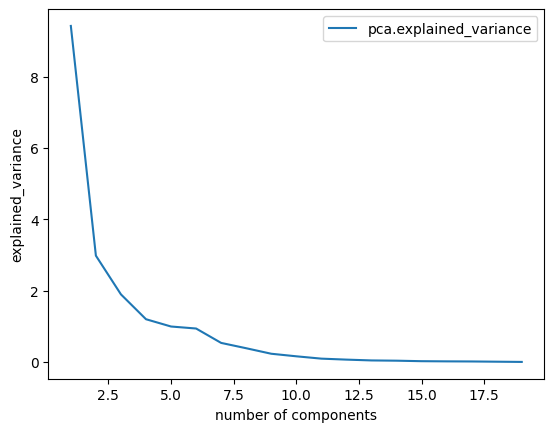

In [10]:
scaler = StandardScaler()
pca=PCA()
pca.fit(scaler.fit_transform(X_train,y_train))
plt.plot(np.arange(1, pca.explained_variance_.shape[0] +1), pca.explained_variance_, label='PCA')
plt.ylabel('explained_variance')
plt.xlabel('components number')
plt.legend()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [11]:
### YOUR CODE HERE
comp_number = 10

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

f1 : 0.6449221989984372
accurace : 0.6632996632996633
accurace2: 197


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

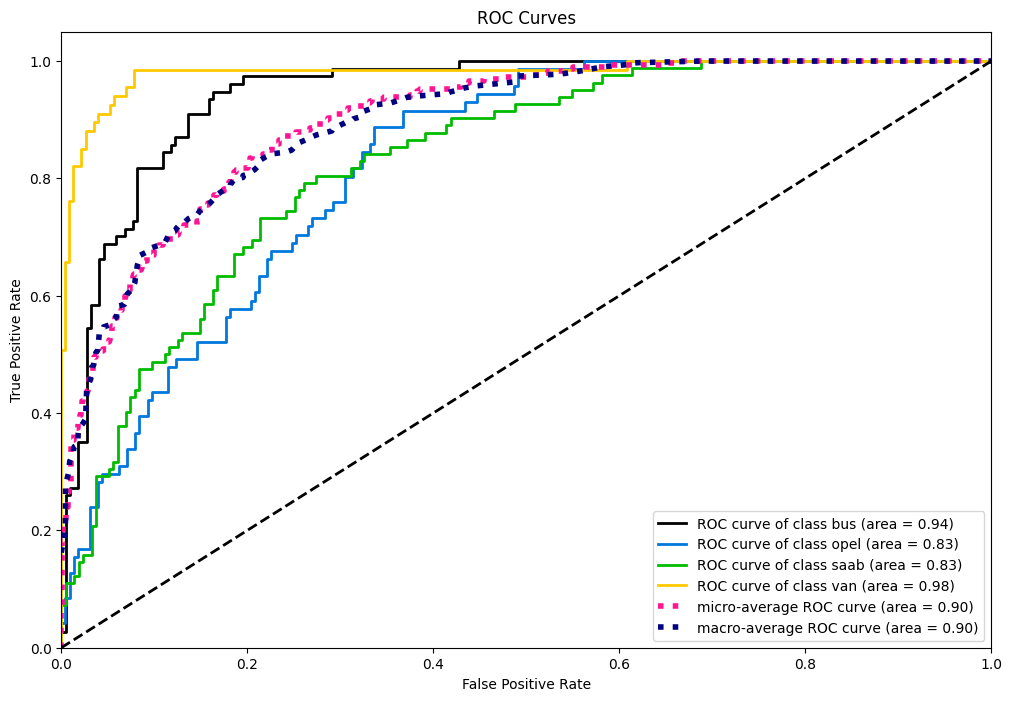

In [12]:
### YOUR CODE HERE
import scikitplot as skplt
from sklearn.pipeline import Pipeline
                                                                          
pca = PCA(comp_number=10)
cls = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3,max_iter=500) 
pipe = Pipeline([('pca', pca), ('logistic', cls)])
pipe.fit(X_train , y_train)
predictions = pipe.predict(X_test)  
print('f1 :', f1_score(predictions , y_test, average='macro'))
print('accurace :', accuracy_score(predictions , y_test))
print('accurace2:',accuracy_score(predictions ,y_test,normalize=False)) 

probs = pipe.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

f1 : 0.7250098737372459
accurace : 0.7239057239057239
accurace2: 215


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

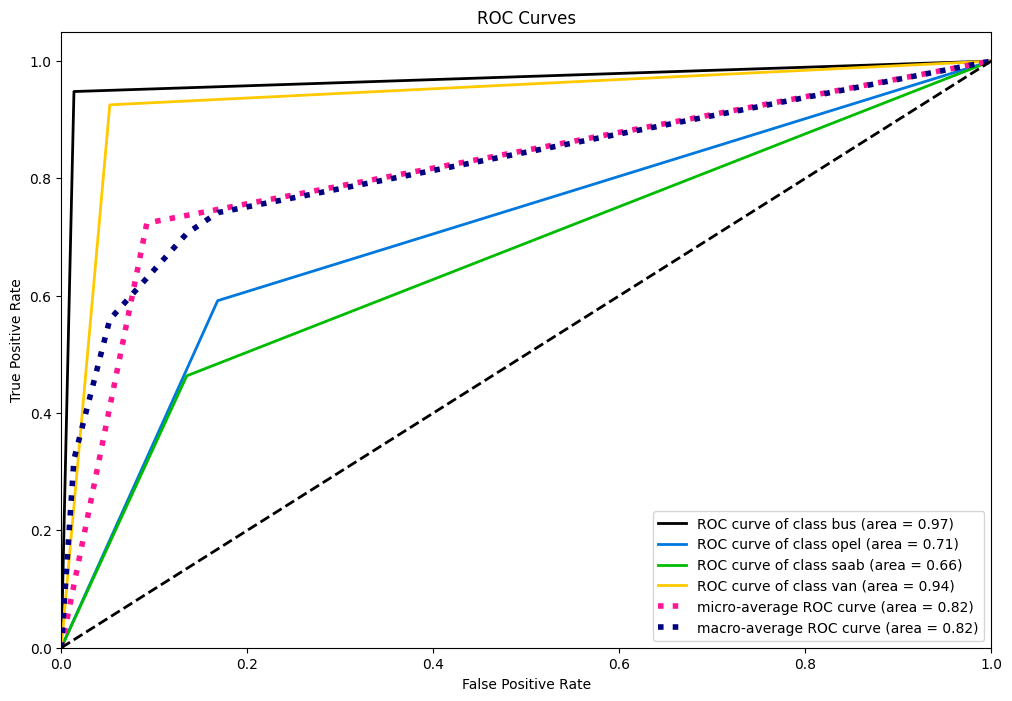

In [13]:
import scikitplot as skplt
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
reg_tree = DecisionTreeClassifier()
reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)
print(f"f1 : {f1_score(reg_tree_pred , y_test, average='macro')}")
print(f"accurace : {accuracy_score(reg_tree_pred , y_test)}")
print(f"accurace2: {accuracy_score(reg_tree_pred ,y_test,normalize=False)}")

probs = reg_tree.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

accuracy: 0.7508417508417509
f1: [0.94871795 0.60927152 0.52173913 0.89932886]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

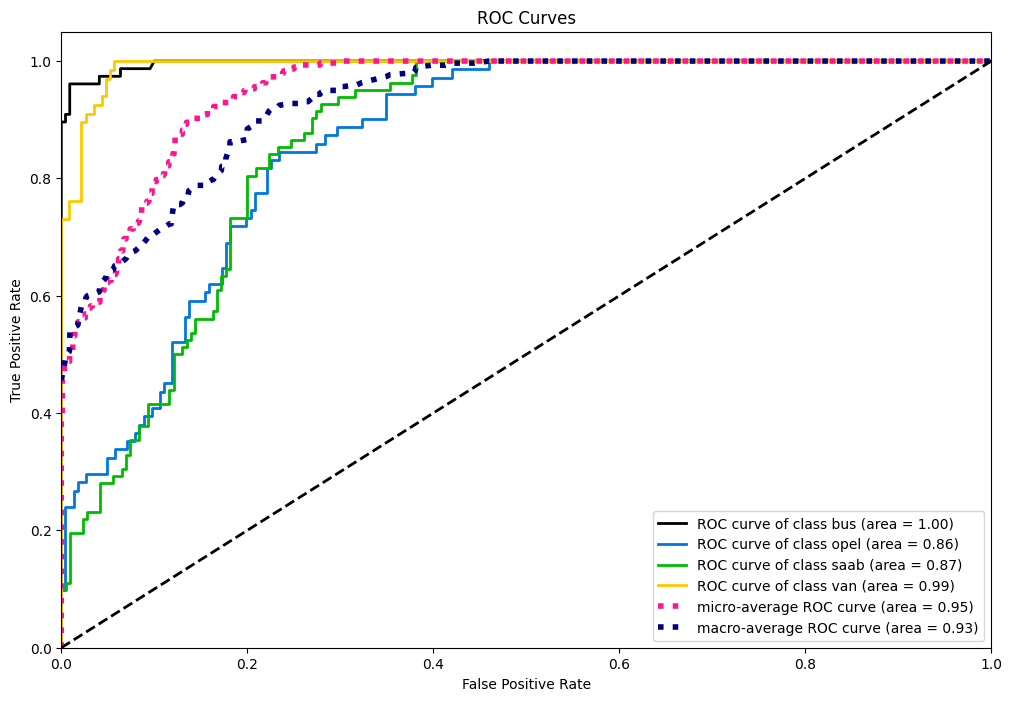

In [14]:
# YOUR CODE HERE

import scikitplot as skplt
from sklearn.ensemble import BaggingClassifier 
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

for i in range(2,100,5): 
 bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9), 
                        n_estimators=i, 
                        random_state=0).fit(X_train, y_train) 
print( 'accuracy:', bag.score(X_test, y_test), ) 
print( 'f1:', f1_score(y_test, bag.predict(X_test), average=None)) 

probs= bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

In [15]:
from sklearn.linear_model import LogisticRegressionCV

for i in range(2,100,5): 
 print(f"{i} num estimators") 
 bag = BaggingClassifier(estimator=LogisticRegressionCV(Cs=100, 
                                                            cv=3, 
                                                            multi_class='multinomial', 
                                                            solver='saga', 
                                                            tol=1e-3, 
                                                            max_iter=500), n_estimators=i, random_state=0).fit(X_train, y_train) 

print( 'accuracy', bag.score(X_test, y_test), ) 
print( 'f1',f1_score(y_test, bag.predict(X_test), average=None), ) 

2  num estimators


7  num estimators
12  num estimators
17  num estimators
22  num estimators
27  num estimators
32  num estimators
37  num estimators
42  num estimators
47  num estimators
52  num estimators
57  num estimators
62  num estimators
67  num estimators
72  num estimators
77  num estimators
82  num estimators
87  num estimators
92  num estimators
97  num estimators
accuracy 0.7272727272727273
f1 [0.88484848 0.55639098 0.56338028 0.85714286]


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

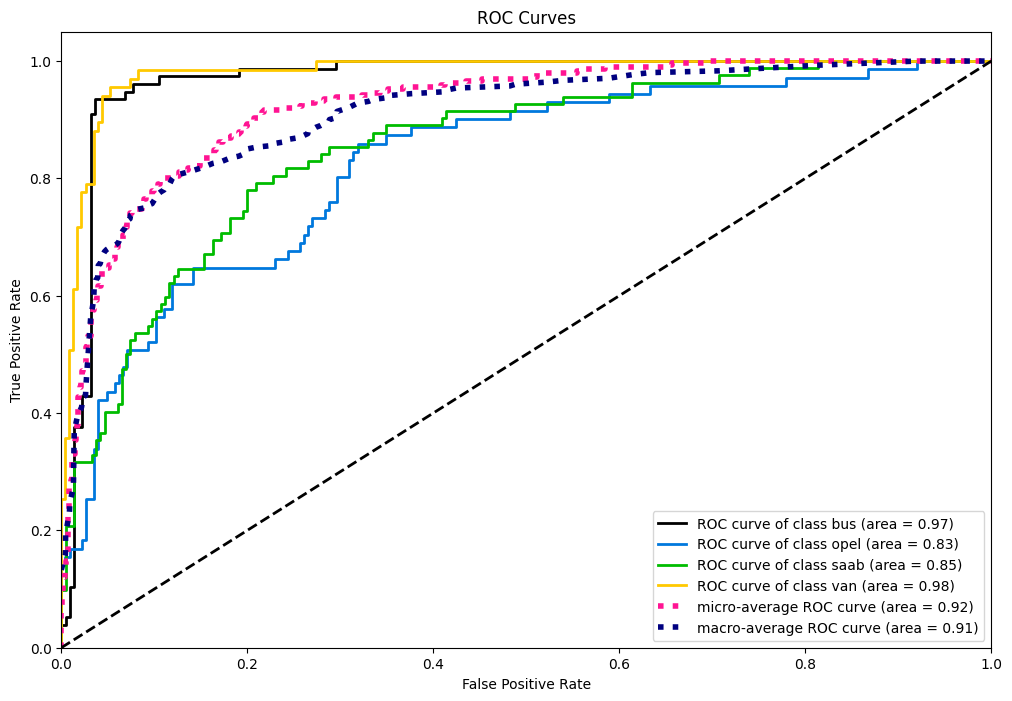

In [16]:
probs= bag.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, probs, figsize=(12, 8))

As we can see, log regression bagging is the same as the log regression model.
Hyperparams are not optimal due to being different each time.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [24]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# YOUR CODE HERE
f1_train = []
acc_train = []
f1_test = []
acc_test = []

n_arr = np.arange(1, 150, 5)

for num in n_arr:
    model_rf = Pipeline([('scale', StandardScaler()),
                 ('pca', PCA(comp_number=comp_number)),
                 ('clf', RandomForestClassifier(n_estimators=num))])

    model_rf.fit(X_train, y_train)
    
    f1_test.append(f1_score(y_test, model_rf.predict(X_test), average='macro'))
    f1_train.append(f1_score(y_train, model_rf.predict(X_train), average='macro'))
    
    acc_test.append(accuracy_score(y_test, model_rf.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model_rf.predict(X_train)))

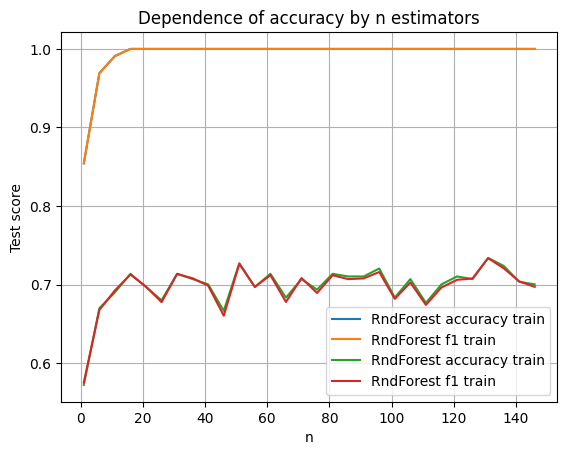

In [29]:
plt.plot(n_arr, acc_train, label='RndForest accuracy train')
plt.plot(n_arr, f1_train, label='RndForest f1 train')
plt.plot(n_arr, acc_test, label='RndForest accuracy train')
plt.plot(n_arr, f1_test, label='RndForest f1 train')
plt.title('Dependence of accuracy by n estimators')
plt.xlabel("n")
plt.ylabel('Test score')
plt.legend(loc='best')
plt.grid(':')
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True)
skf_iter = skf.split(X_train, y_train)
X_train_part = []
y_train_part = []

pipe = Pipeline([('scale', StandardScaler()),
                 ('clf', LogisticRegression(multi_class='multinomial',
                                            solver='saga',
                                            tol=1e-3,
                                            max_iter=500,
                                            random_state=42))])

param_grid = {'clf__C' : np.linspace(0, 10, 100)}

f1_res = []
acc_res = []
data_size = []

for _, fold in skf_iter:
    
    if len(X_train_part) != 0:
        X_train_part = np.vstack((X_train_part, X_train[fold]))
        y_train_part = np.hstack((y_train_part, y_train[fold]))
    else:
        X_train_part = X_train[fold]
        y_train_part = y_train[fold]
        
   
    pipe.fit(X_train_part, y_train_part)
    models=pipe.predict(X_test)
    data_size.append(X_train_part.shape[0])
    print('f1 score: ', f1_score(y_test, models, average='macro'))
    print('accuracy: ', accuracy_score(y_test, models))

f1 score:  0.668313176287657
accuracy:  0.67003367003367
f1 score:  0.7455212216783291
accuracy:  0.7474747474747475
f1 score:  0.7635899420742722
accuracy:  0.7643097643097643
f1 score:  0.7409886141293035
accuracy:  0.7407407407407407
f1 score:  0.7815210932857992
accuracy:  0.7777777777777778
f1 score:  0.782448567290879
accuracy:  0.7777777777777778
f1 score:  0.7955279496286809
accuracy:  0.7912457912457912
f1 score:  0.781797588934996
accuracy:  0.7777777777777778
f1 score:  0.7813900425610594
accuracy:  0.7777777777777778
f1 score:  0.7940865906194372
accuracy:  0.7912457912457912


Dataset enlargening leads to metrics stabilisation.